In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
task_folder = "results/alpha0.5_ni10_n200"

# success ratio

In [3]:
import json

In [4]:
with open(os.path.join(task_folder, "success_ratio.json"),"r") as f:
    values = json.load(f)

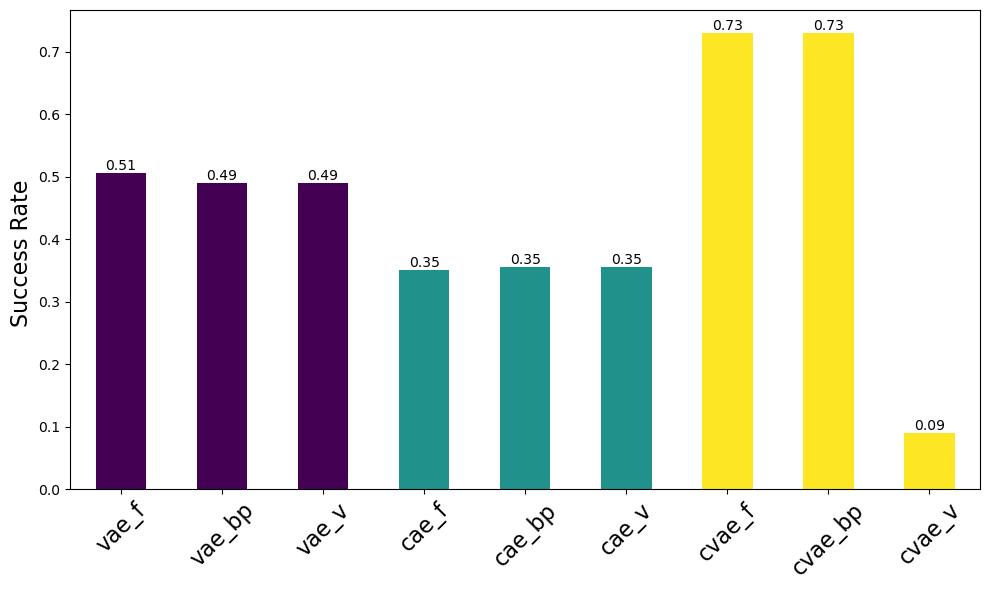

In [27]:
# Convert the dictionary to a pandas Series
values_series = pd.Series(values)

# Rename columns according to the specified rules
values_series.index = values_series.index.str.replace('_forward_gradient', '_f')
values_series.index = values_series.index.str.replace('_bp_gradient', '_bp')
values_series.index = values_series.index.str.replace('_vanilla', '_v')

# Removing the prefix "lava_" from the index
values_series.index = values_series.index.str.replace('lava_', '')

# Define colors using a scientific colormap
cmap = cm.get_cmap('viridis', 3)
colors = [cmap(0) if col.startswith("vae") else cmap(1) if 'cae' in col else cmap(2) for col in values_series.index]

# Plotting the values as a bar chart without the prefix
plt.figure(figsize=(10, 6))
bars = values_series.plot(kind='bar', color=colors)
#plt.title('Success Rate for Each Algorithm')
plt.ylabel('Success Rate ', fontsize=16)
#plt.xlabel('Algorithm')
plt.xticks(rotation=45, fontsize=16)
# plt.grid(True)

# Adding the value labels on top of the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.tight_layout()
plt.savefig('lava_success_rate.pdf')
plt.show()

In [8]:
print(values_series.keys())

Index(['vae_f', 'vae_bp', 'vae_v', 'cae_f', 'cae_bp', 'cae_v', 'cvae_f',
       'cvae_bp', 'cvae_v'],
      dtype='object')


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(os.path.join(task_folder, "results.csv"))

In [8]:
df

,index,index_in_dataset,t_lava_vae_forward_gradient,t_lava_vae_bp_gradient,t_lava_vae_vanilla,t_lava_cae_forward_gradient,t_lava_cae_bp_gradient,t_lava_cae_vanilla,t_lava_cvae_forward_gradient,t_lava_cvae_bp_gradient,...,mse_lava_cvae_vanilla,valid_lava_vae_forward_gradient,valid_lava_vae_bp_gradient,valid_lava_vae_vanilla,valid_lava_cae_forward_gradient,valid_lava_cae_bp_gradient,valid_lava_cae_vanilla,valid_lava_cvae_forward_gradient,valid_lava_cvae_bp_gradient,valid_lava_cvae_vanilla
0,0,8374,1.778693,0.500679,0.345145,1.034235,0.353593,0.424374,0.515135,0.168182,...,NaN,ood,ood,ood,id,id,ood,ood,ood,NaN
1,2,5103,1.254479,0.575434,0.464878,1.833667,0.562018,0.728929,1.997706,0.648680,...,NaN,id,id,id,id,id,id,NaN,NaN,NaN
2,3,8963,0.963985,0.354952,0.355953,2.550994,0.622571,0.612910,1.996494,0.654903,...,NaN,id,id,id,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4993,1.246468,0.521255,0.516436,1.812339,0.610892,0.606204,1.961226,0.683768,...,NaN,id,id,id,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9069,0.422540,0.192972,0.188067,0.562862,0.199621,0.199852,0.406219,0.150881,...,NaN,id,id,id,id,id,id,id,id,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,136,9348,1.572715,0.598520,0.595828,1.856590,0.632210,0.624247,0.623631,0.223866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id,id,NaN
117,137,4079,1.387069,0.646605,0.635093,1.839045,0.623654,1.066936,0.646865,0.162215,...,NaN,id,id,id,id,id,id,id,id,NaN
118,138,9833,0.554186,0.246385,0.246543,1.094339,0.377578,0.376354,0.407725,0.155861,...,NaN,id,id,id,id,id,id,id,ood,NaN
119,139,1315,0.576406,0.253667,0.306304,0.753232,0.277136,0.267523,0.615387,0.214455,...,NaN,id,id,id,id,id,id,ood,id,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             121 non-null    int64  
 1   index_in_dataset                  121 non-null    int64  
 2   t_lava_vae_forward_gradient       121 non-null    float64
 3   t_lava_vae_bp_gradient            121 non-null    float64
 4   t_lava_vae_vanilla                121 non-null    float64
 5   t_lava_cae_forward_gradient       121 non-null    float64
 6   t_lava_cae_bp_gradient            121 non-null    float64
 7   t_lava_cae_vanilla                121 non-null    float64
 8   t_lava_cvae_forward_gradient      121 non-null    float64
 9   t_lava_cvae_bp_gradient           121 non-null    float64
 10  t_lava_cvae_vanilla               121 non-null    float64
 11  kl_lava_vae_forward_gradient      73 non-null     float64
 12  kl_lava_

# average_time

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

vae_f      1.090648
vae_bp     0.460428
vae_v      0.453870
cae_f      1.634798
cae_bp     0.565436
cae_v      0.554465
cvae_f     0.760529
cvae_bp    0.267233
cvae_v     0.678911
dtype: float64


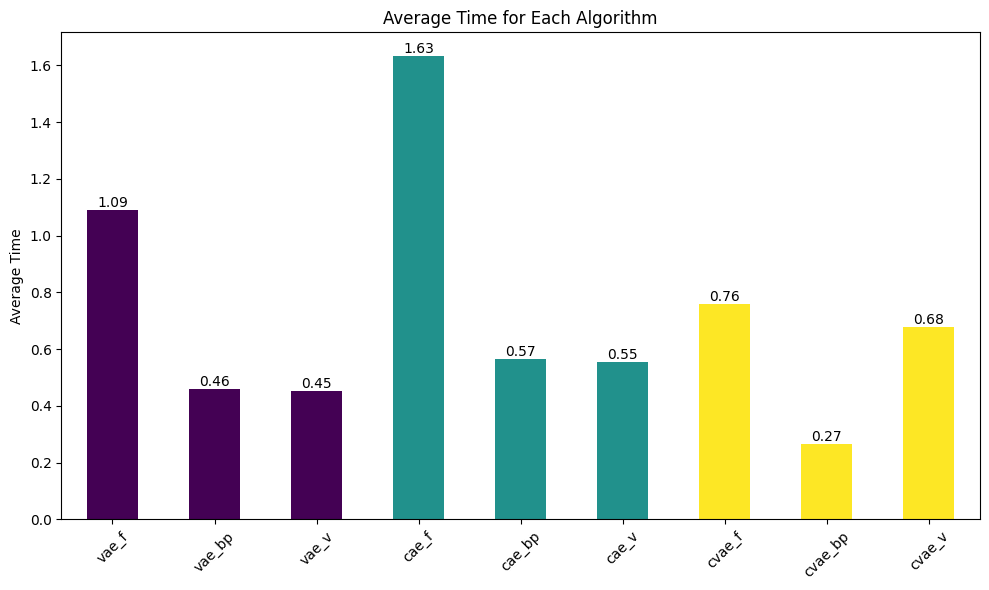

In [11]:

time_columns = [
    't_lava_vae_forward_gradient', 't_lava_vae_bp_gradient', 't_lava_vae_vanilla',
    't_lava_cae_forward_gradient', 't_lava_cae_bp_gradient', 't_lava_cae_vanilla',
    't_lava_cvae_forward_gradient', 't_lava_cvae_bp_gradient', 't_lava_cvae_vanilla'
]

average_times = df[time_columns].mean()
# Rename columns according to the specified rules
average_times.index = values_series.index.str.replace('_forward_gradient', '_f')
average_times.index = values_series.index.str.replace('_bp_gradient', '_bp')
average_times.index = values_series.index.str.replace('_vanilla', '_v')

average_times.index = average_times.index.str.replace('t_lava_', '')

# Print the average times
print(average_times)

cmap = cm.get_cmap('viridis', 3)
colors = [cmap(0) if col.startswith("vae") else cmap(1) if 'cae' in col else cmap(2) for col in average_times.index]

plt.figure(figsize=(10, 6))
bars = average_times.plot(kind='bar', color=colors)
plt.title('Average Time for Each Algorithm')
plt.ylabel('Average Time')
#plt.xlabel('Algorithm')
plt.xticks(rotation=45)
# plt.grid(True)

# Adding the value labels on top of the bars
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom')

plt.tight_layout()
plt.savefig('lava_average_time.pdf')
plt.show()

# Metrics

In [12]:
from sklearn.preprocessing import MinMaxScaler

Average Normalized KL_LAVA_ Scores:
vae_forward_gradient     0.142821
vae_bp_gradient          0.115895
vae_vanilla              0.083983
cae_forward_gradient     0.159183
cae_bp_gradient          0.060210
cae_vanilla              0.118224
cvae_forward_gradient    0.176041
cvae_bp_gradient         0.222279
cvae_vanilla             0.392312
dtype: float64


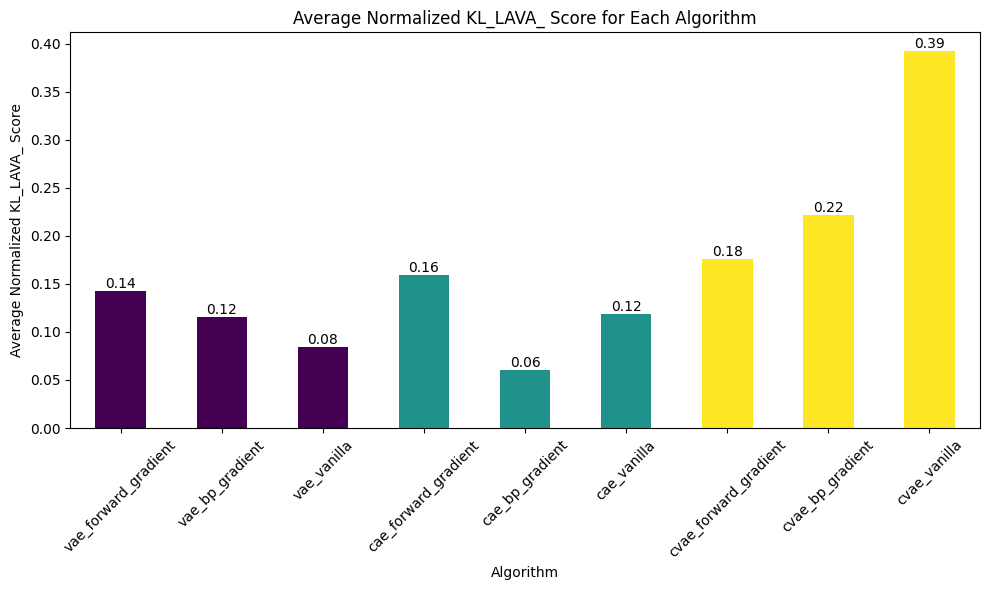

Average Normalized WS_LAVA_ Scores:
vae_forward_gradient     0.250242
vae_bp_gradient          0.304585
vae_vanilla              0.255050
cae_forward_gradient     0.247971
cae_bp_gradient          0.231300
cae_vanilla              0.180750
cvae_forward_gradient    0.201474
cvae_bp_gradient         0.212926
cvae_vanilla             0.421753
dtype: float64


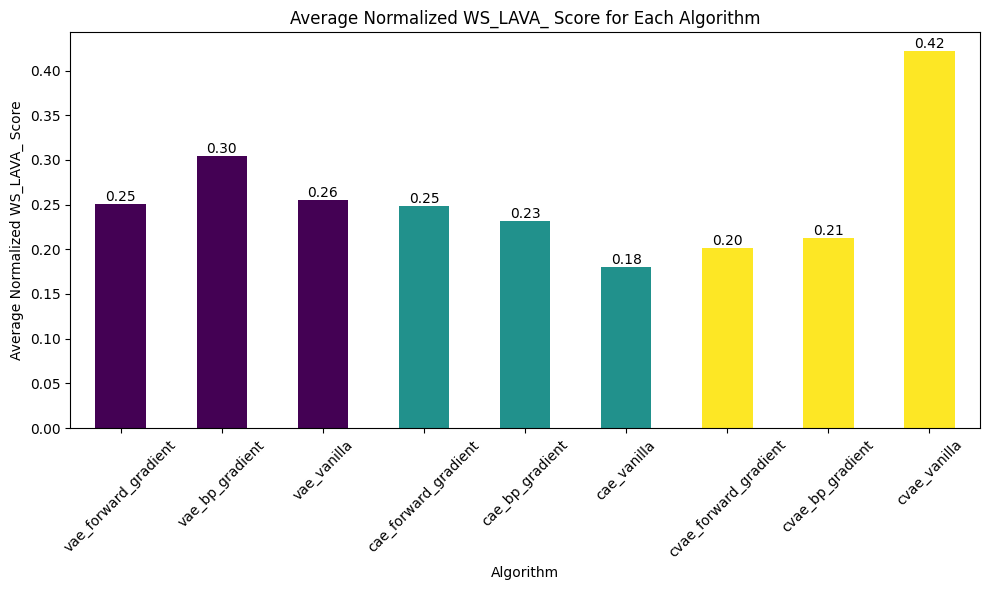

Average Normalized JS_LAVA_ Scores:
vae_forward_gradient     0.158616
vae_bp_gradient          0.130572
vae_vanilla              0.092834
cae_forward_gradient     0.179701
cae_bp_gradient          0.069130
cae_vanilla              0.137899
cvae_forward_gradient    0.177204
cvae_bp_gradient         0.230944
cvae_vanilla             0.398029
dtype: float64


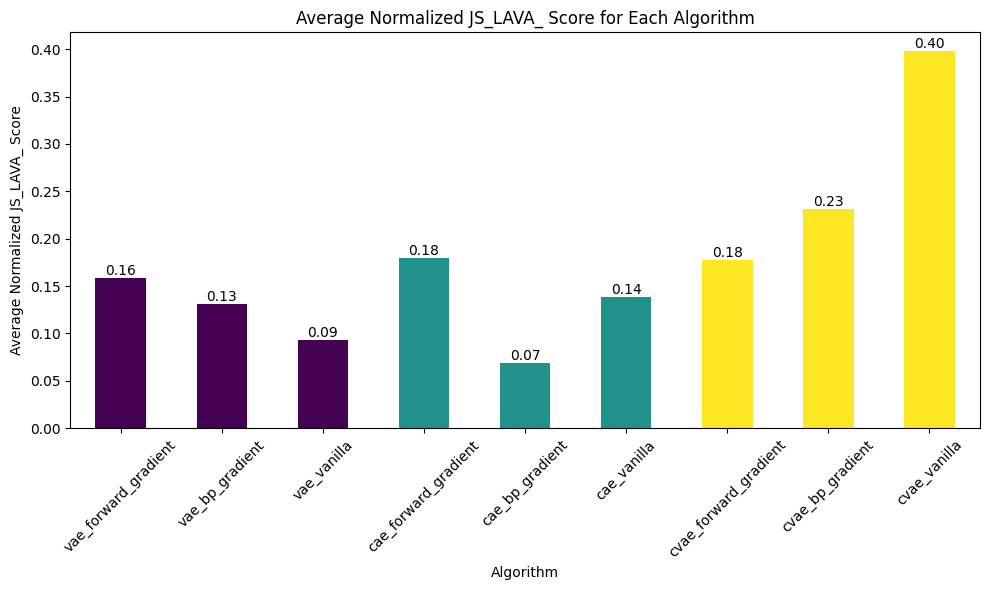

Average Normalized MSE_LAVA_ Scores:
vae_forward_gradient     0.285502
vae_bp_gradient          0.288871
vae_vanilla              0.373402
cae_forward_gradient     0.290617
cae_bp_gradient          0.277409
cae_vanilla              0.324754
cvae_forward_gradient    0.411430
cvae_bp_gradient         0.472537
cvae_vanilla             0.449386
dtype: float64


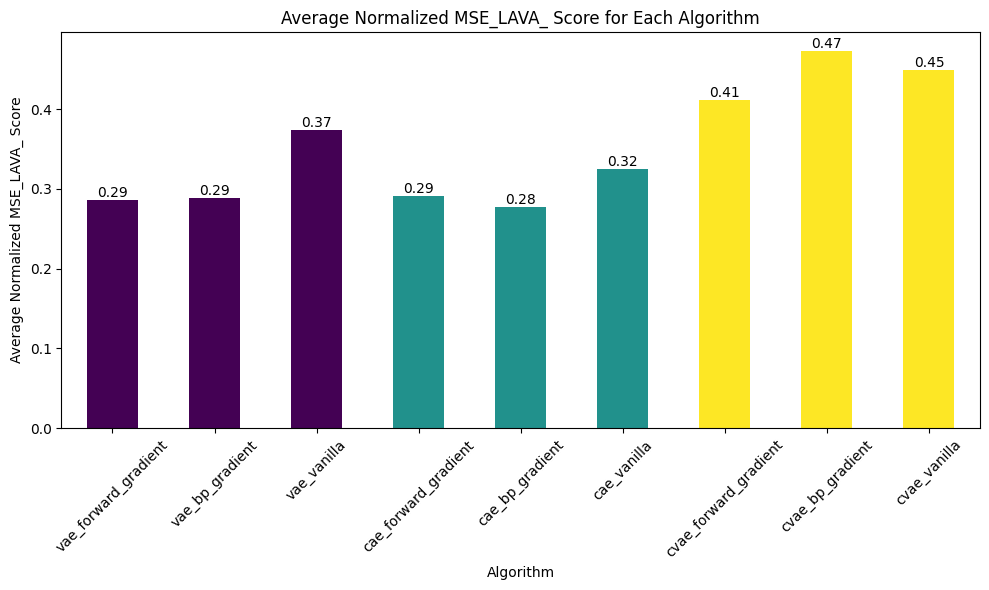

In [13]:
# Function to normalize and plot data
def normalize_and_plot(data, prefix):
    # Handle NaN values by filling with the column mean for these columns
    data = data.apply(lambda x: x.fillna(x.mean()), axis=0)
    
    # Drop any remaining columns with NaN values if any
    data = data.dropna(axis=1, how='all')
    
    # Apply Min-Max normalization if there are any columns left
    if not data.empty:
        scaler = MinMaxScaler()
        normalized = scaler.fit_transform(data)
        normalized_df = pd.DataFrame(normalized, columns=data.columns)
        
        # Calculate the average of the normalized scores
        average_scores = normalized_df.mean()
        
        # Remove the prefix from the index
        average_scores.index = average_scores.index.str.replace(prefix, '')
        
        # Print the average normalized scores
        print(f'Average Normalized {prefix.upper()} Scores:')
        print(average_scores)
        
        # Define colors using a scientific colormap
        cmap = cm.get_cmap('viridis', 3)
        colors = [cmap(0) if col.startswith("vae") else cmap(1) if 'cae' in col else cmap(2) for col in average_scores.index]
        
        # Plotting the average normalized scores as a bar chart
        plt.figure(figsize=(10, 6))
        bars = average_scores.plot(kind='bar', color=colors)
        plt.title(f'Average Normalized {prefix.upper()} Score for Each Algorithm')
        plt.ylabel(f'Average Normalized {prefix.upper()} Score')
        plt.xlabel('Algorithm')
        plt.xticks(rotation=45)
        # plt.grid(True)
        
        # Adding the value labels on top of the bars
        for bar in bars.patches:
            bars.annotate(f'{bar.get_height():.2f}', 
                          (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                          ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid {prefix.upper()} columns available for normalization and plotting.")

# Normalize and plot for KL, WS, JS, and MSE columns
normalize_and_plot(df[[col for col in df.columns if col.startswith('kl_')]], 'kl_lava_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('ws_')]], 'ws_lava_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('js_')]], 'js_lava_')
normalize_and_plot(df[[col for col in df.columns if col.startswith('mse_')]], 'mse_lava_')
